# EDA & Data Visualization

In [1]:
#importing libraries 
import numpy as np #linear algebra
import pandas as pd #data processing and analysis
import seaborn as sns #data visualization
import matplotlib.pyplot as plt 

In [2]:
#reading the dataset
df= pd.read_csv("C:/Users/rumey/Desktop/DataSet/heart.csv")
df.head() #first five rows

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


age: Age of the patient

sex: Sex of the patient

cp: Chest pain type -> 0 = Typical Angina, 1 = Atypical Angina, 2 = Non-anginal Pain, 3 = Asymptomatic

trtbps: Resting blood pressure (in mm Hg)

chol: Cholestoral in mg/dl fetched via BMI sensor

fbs: (fasting blood sugar > 120 mg/dl) -> 1 = True, 0 = False

restecg: Resting electrocardiographic results -> 0 = Normal, 1 = ST-T wave normality, 2 = Left ventricular hypertrophy

thalachh: Maximum heart rate achieved

oldpeak: Previous peak

slp: Slope

caa: Number of major vessels

thall: Thalium Stress Test result -> (0,3)

exng: Exercise induced angina -> 1 = Yes, 0 = No

output: Target variable 

In [3]:
print("The shape of the dataset: ", df.shape) #dimensions of the data

The shape of the dataset:  (303, 14)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


There are 303 instances in the dataset.
There are no missing values.

In [5]:
#check for duplicated rows
df[df.duplicated()]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [6]:
#remove duplicated rows 
df.drop_duplicates(keep='first',inplace=True)

In [7]:
#check for new shape
print("The shape of the dataset: ", df.shape) 

The shape of the dataset:  (302, 14)


In [8]:
df.describe() #take a look at the summary of the numerical attributes

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


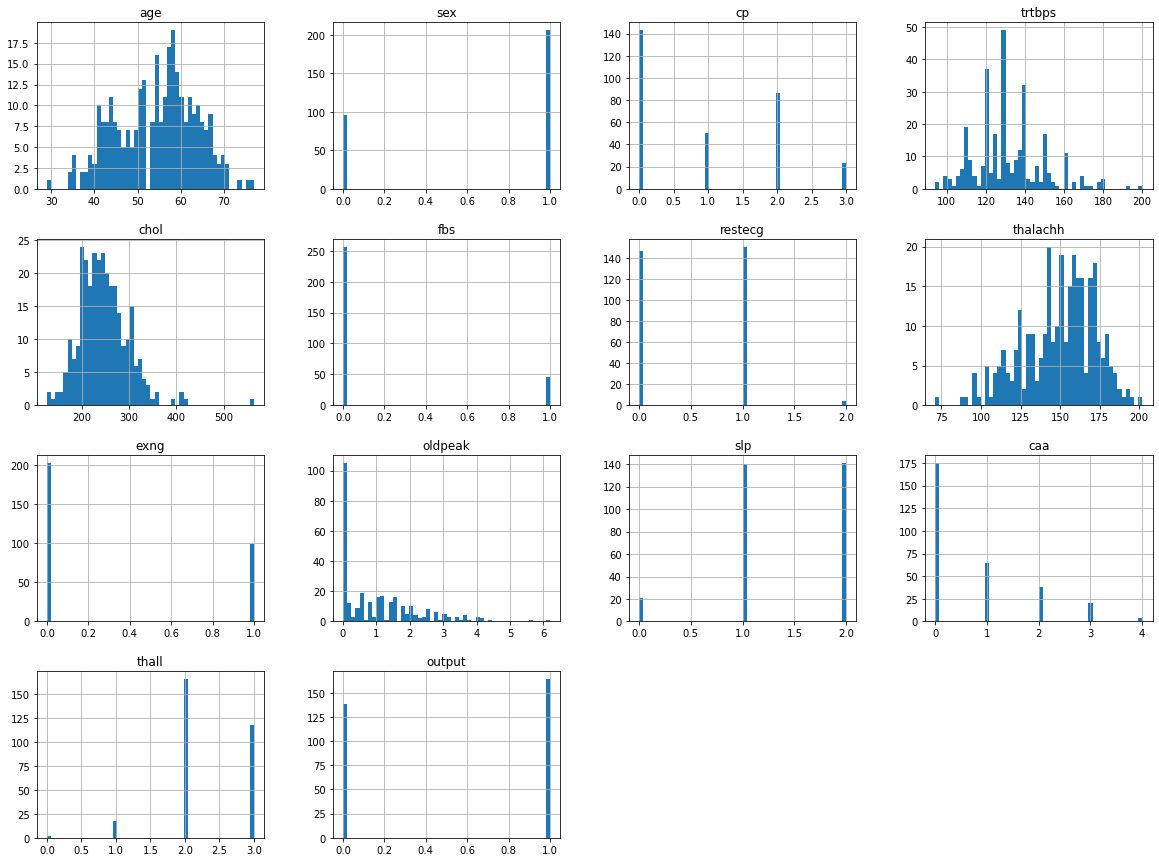

In [9]:
#plot a histogram for each numerical attribute
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

A histogram for each numerical attribute

In [11]:
#computing correlation matrix
corr_matrix=df.corr()
corr_matrix

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trtbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalachh,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exng,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


In [12]:
#Split data into categorical and continuous for better analysis
cat_feat = ['sex','exng','caa','cp','fbs','restecg','slp','thall']
con_feat = ["age","trtbps","chol","thalachh","oldpeak"]
output = ["output"]
print("The categorial features are : ", cat_feat)
print("The continuous features are : ", con_feat)
print("The target variable is :  ", output)


The categorial features are :  ['sex', 'exng', 'caa', 'cp', 'fbs', 'restecg', 'slp', 'thall']
The continuous features are :  ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
The target variable is :   ['output']


Text(0.5, 1.0, 'HEATMAP FOR CORRELATION MATRIX')

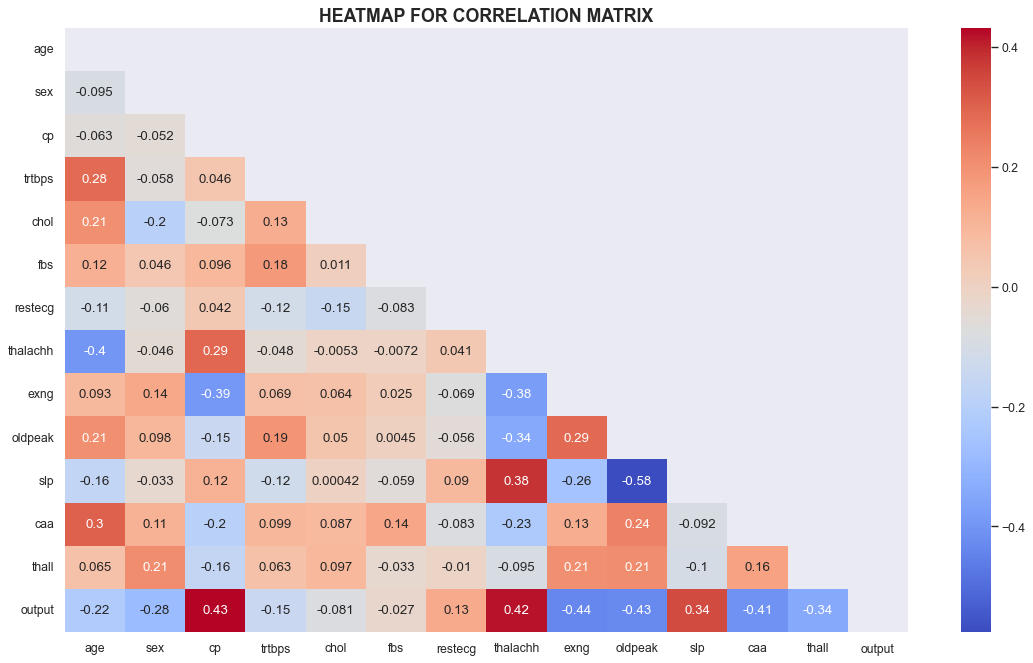

In [85]:
sns.set(rc = {'figure.figsize':(17,10)})
plt.figure(dpi = 80)
ax = plt.axes()
mask = np.triu(np.ones_like(corr_matrix))
sns.heatmap(corr_matrix,ax=ax,cmap="coolwarm",annot=True,mask=mask)
ax.set_title('HEATMAP FOR CORRELATION MATRIX',fontdict={"fontsize":16,"fontweight":"bold","fontfamily":"sans-serif"})


Heatmap for correlation matrix

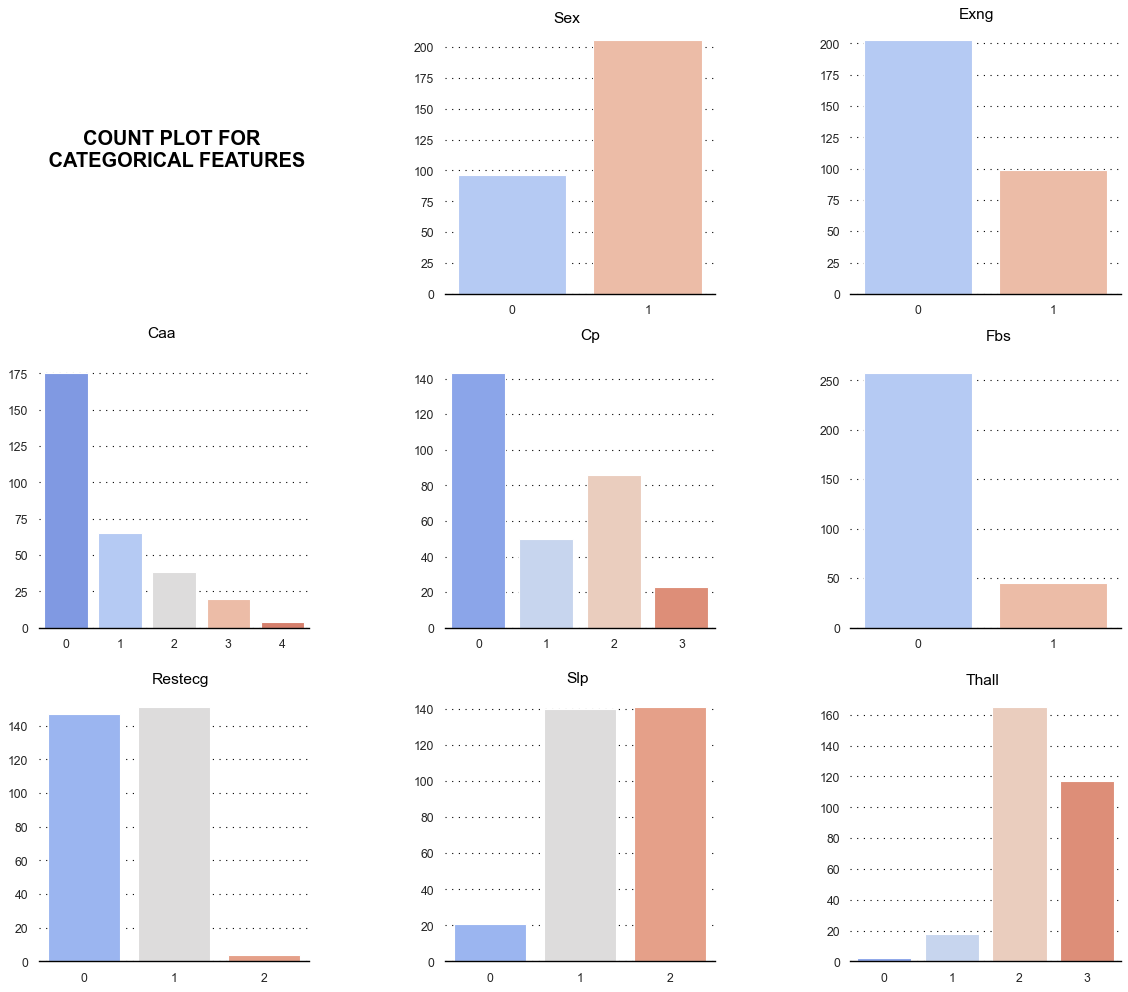

In [71]:
fig = plt.figure(figsize=(24,21),dpi=80)
gs = fig.add_gridspec(4,4)
gs.update(wspace=0.5, hspace=0.25)

#Adding subplots
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[1,2])
ax6 = fig.add_subplot(gs[2,0])
ax7 = fig.add_subplot(gs[2,1])
ax8 = fig.add_subplot(gs[2,2])

background_color = "#FFFFFF"
color_palette = "coolwarm"
fig.patch.set_facecolor(background_color) 
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 
ax2.set_facecolor(background_color) 
ax3.set_facecolor(background_color) 
ax4.set_facecolor(background_color) 
ax5.set_facecolor(background_color) 
ax6.set_facecolor(background_color) 
ax7.set_facecolor(background_color) 
ax8.set_facecolor(background_color)


#Title
ax0.spines["bottom"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["top"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.axis('off')
ax0.text(0.5,0.5,'COUNT PLOT FOR \n CATEGORICAL FEATURES\n',horizontalalignment='center',verticalalignment='center',fontsize=18, fontweight='bold',
         fontfamily='sans-serif',color="#000000")

# Sex count
ax1.text(0.3, 220, 'Sex', fontsize=14, fontfamily='sans-serif', color="#000000")
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
#sns.swarmplot(ax=ax1, x ='sex', data = df,size=0.5, palette=color_palette)
sns.countplot(ax=ax1,data=df,x='sex',palette=color_palette)
ax1.set_xlabel("")
ax1.set_ylabel("")
ax1.spines['bottom'].set_color('black')

# Exng count
ax2.text(0.3, 220, 'Exng', fontsize=14,fontfamily='sans-serif', color="#000000")
ax2.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax2,data=df,x='exng',palette=color_palette)
ax2.set_xlabel("")
ax2.set_ylabel("")
ax2.spines['bottom'].set_color('black')

# Caa count
ax3.text(1.5, 200, 'Caa', fontsize=14, fontfamily='sans-serif', color="#000000")
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax3,data=df,x='caa',palette=color_palette)
ax3.set_xlabel("")
ax3.set_ylabel("")
ax3.spines['bottom'].set_color('black')

# Cp count
ax4.text(1.5, 162, 'Cp', fontsize=14, fontfamily='sans-serif', color="#000000")
ax4.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax4,data=df,x='cp',palette=color_palette)
ax4.set_xlabel("")
ax4.set_ylabel("")
ax4.spines['bottom'].set_color('black')

# Fbs count
ax5.text(0.5, 290, 'Fbs', fontsize=14, fontfamily='sans-serif', color="#000000")
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax5,data=df,x='fbs',palette=color_palette)
ax5.set_xlabel("")
ax5.set_ylabel("")
ax5.spines['bottom'].set_color('black')

# Restecg count
ax6.text(0.75, 165, 'Restecg', fontsize=14, fontfamily='sans-serif', color="#000000")
ax6.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax6,data=df,x='restecg',palette=color_palette)
ax6.set_xlabel("")
ax6.set_ylabel("")
ax6.spines['bottom'].set_color('black')

# Slp count
ax7.text(0.85, 155, 'Slp', fontsize=14, fontfamily='sans-serif', color="#000000")
ax7.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax7,data=df,x='slp',palette=color_palette)
ax7.set_xlabel("")
ax7.set_ylabel("")
ax7.spines['bottom'].set_color('black')

# Thall count
ax8.text(1.2, 180, 'Thall', fontsize=14, fontfamily='sans-serif', color="#000000")
ax8.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax8,data=df,x='thall',palette=color_palette)
ax8.set_xlabel("")
ax8.set_ylabel("")
ax8.spines['bottom'].set_color('black')

for s in ["top","right","left"]:
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)
    ax3.spines[s].set_visible(False)
    ax4.spines[s].set_visible(False)
    ax5.spines[s].set_visible(False)
    ax6.spines[s].set_visible(False)
    ax7.spines[s].set_visible(False)
    ax8.spines[s].set_visible(False)

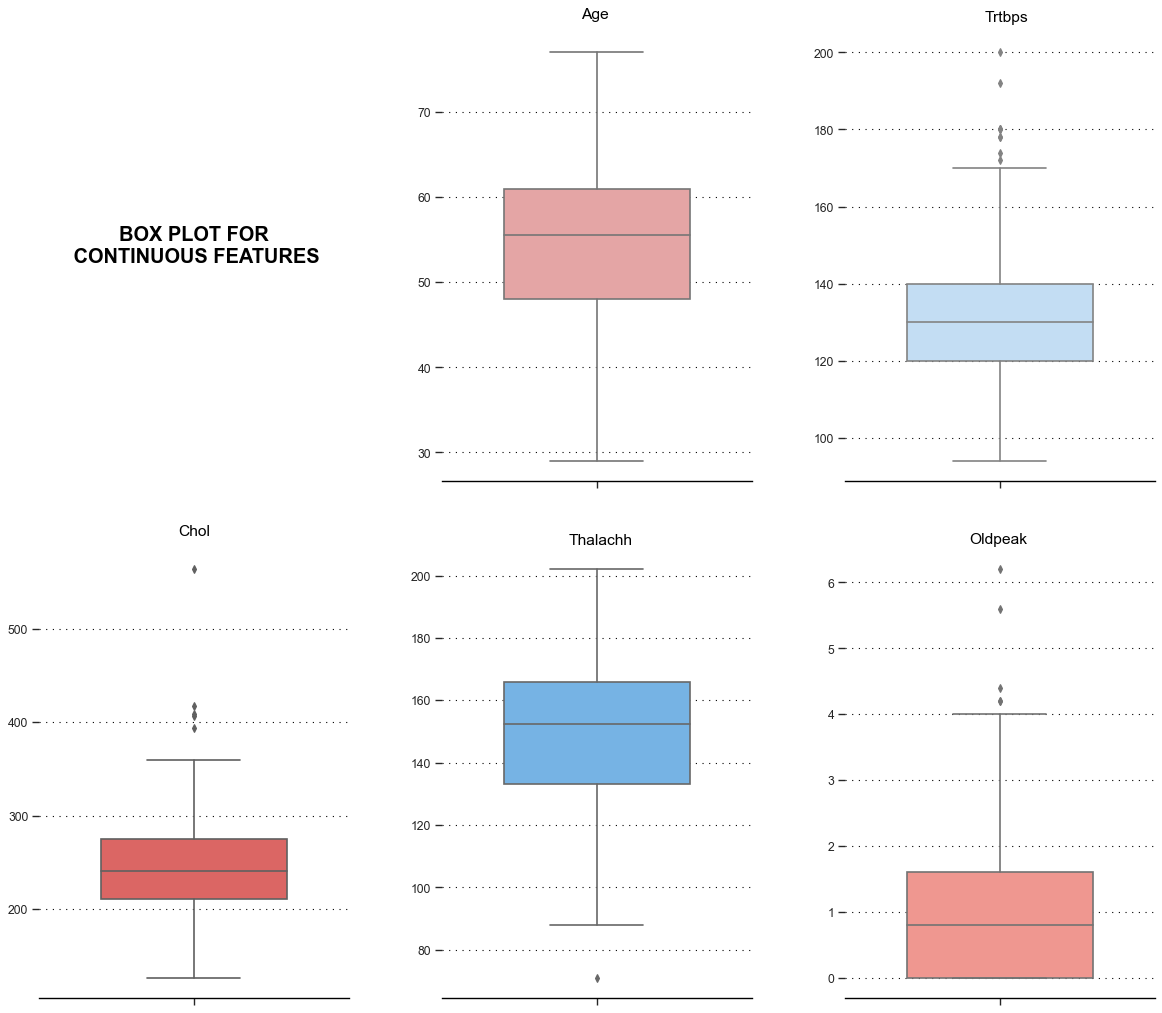

In [59]:
fig = plt.figure(figsize=(18,16),dpi=80)
gs = fig.add_gridspec(2,3)
gs.update(wspace=0.3, hspace=0.15)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[1,2])

background_color = "#FFFFFF"
color_palette = "coolwarm"
fig.patch.set_facecolor(background_color) 
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 
ax2.set_facecolor(background_color) 
ax3.set_facecolor(background_color) 
ax4.set_facecolor(background_color) 
ax5.set_facecolor(background_color) 

# Title of the plot
ax0.spines["bottom"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["top"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.axis('off')
ax0.text(0.5,0.5,'BOX PLOT FOR\n CONTINUOUS FEATURES\n',horizontalalignment='center',verticalalignment='center',fontsize=18,
         fontweight='bold',fontfamily='sans-serif',color="#000000")

# Age 
ax1.text(-0.05, 81, 'Age', fontsize=14,fontfamily='sans-serif', color="#000000")
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxplot(ax=ax1,y=df['age'],palette=["#EF9A9A"],width=0.6)
ax1.set_xlabel("")
ax1.set_ylabel("")
ax1.spines['bottom'].set_color('black')

# Trtbps 
ax2.text(-0.05, 208, 'Trtbps', fontsize=14, fontfamily='sans-serif', color="#000000")
ax2.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxplot(ax=ax2,y=df['trtbps'],palette=["#BBDEFB"],width=0.6)
ax2.set_xlabel("")
ax2.set_ylabel("")
ax2.spines['bottom'].set_color('black')

# Chol 
ax3.text(-0.05, 600, 'Chol', fontsize=14,  fontfamily='sans-serif', color="#000000")
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxplot(ax=ax3,y=df['chol'],palette=["#EF5350"],width=0.6)
ax3.set_xlabel("")
ax3.set_ylabel("")
ax3.spines['bottom'].set_color('black')

# Thalachh 
ax4.text(-0.09, 210, 'Thalachh', fontsize=14, fontfamily='sans-serif', color="#000000")
ax4.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxplot(ax=ax4,y=df['thalachh'],palette=["#64B5F6"],width=0.6)
ax4.set_xlabel("")
ax4.set_ylabel("")
ax4.spines['bottom'].set_color('black')

# oldpeak 
ax5.text(-0.1, 6.6, 'Oldpeak', fontsize=14, fontfamily='sans-serif', color="#000000")
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxplot(ax=ax5,y=df['oldpeak'],palette=["#FF8A80"],width=0.6)
ax5.set_xlabel("")
ax5.set_ylabel("")
ax5.spines['bottom'].set_color('black')


for s in ["top","right","left"]:
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)
    ax3.spines[s].set_visible(False)
    ax4.spines[s].set_visible(False)
    ax5.spines[s].set_visible(False)

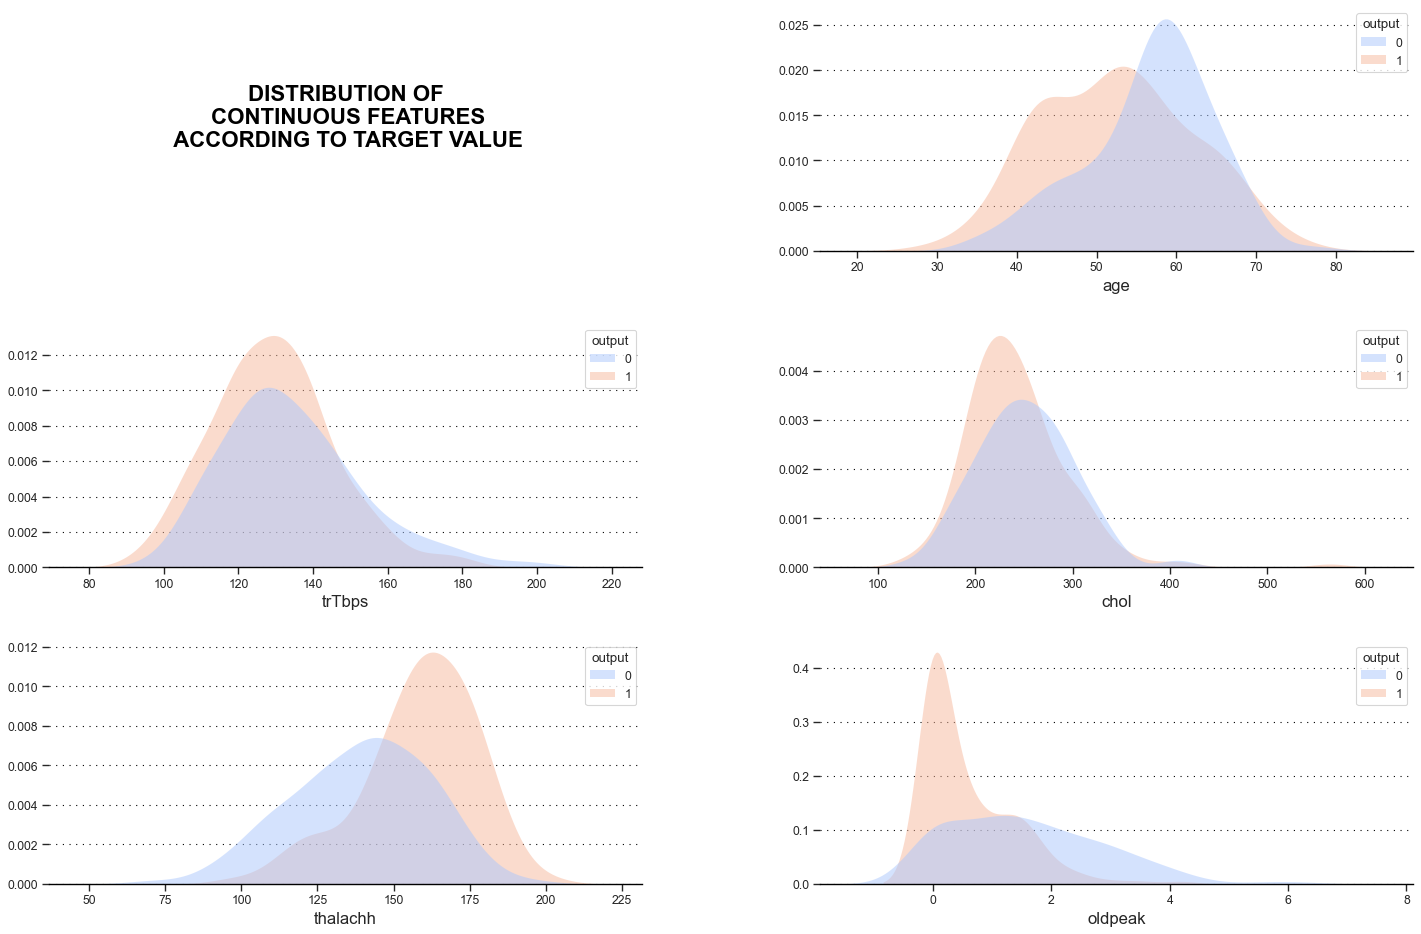

In [55]:
fig = plt.figure(figsize=(22,25),dpi=80)
gs = fig.add_gridspec(5,2)
gs.update(wspace=0.3, hspace=0.3)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])
ax4 = fig.add_subplot(gs[2,0])
ax5 = fig.add_subplot(gs[2,1])


background_color="#FFFFFF"
color_palette = "coolwarm"
fig.patch.set_facecolor(background_color) 
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 
ax2.set_facecolor(background_color) 
ax3.set_facecolor(background_color) 
ax4.set_facecolor(background_color) 
ax5.set_facecolor(background_color)

#Title
ax0.spines["bottom"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["top"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.axis('off')
ax0.text(0.5,0.5,'DISTRIBUTION OF\n CONTINUOUS FEATURES\n ACCORDING TO TARGET VALUE\n',horizontalalignment='center',
         verticalalignment='center',fontsize=20, fontweight='bold',fontfamily='sans-serif',color="#000000")

# Age
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax1, data=df, x='age',hue="output", fill=True,palette=color_palette, alpha=.5, linewidth=0)
ax1.set_xlabel("age",fontsize=15)
ax1.set_ylabel("")
ax1.spines['bottom'].set_color('black')

# TrTbps
ax2.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax2, data=df, x='trtbps',hue="output", fill=True,palette=color_palette, alpha=.5, linewidth=0)
ax2.set_xlabel("trTbps",fontsize=15)
ax2.set_ylabel("")
ax2.spines['bottom'].set_color('black')

# Chol
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax3, data=df, x='chol',hue="output", fill=True,palette=color_palette, alpha=.5, linewidth=0)
ax3.set_xlabel("chol",fontsize=15)
ax3.set_ylabel("")
ax3.spines['bottom'].set_color('black')

# Thalachh
ax4.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax4, data=df, x='thalachh',hue="output", fill=True,palette=color_palette, alpha=.5, linewidth=0)
ax4.set_xlabel("thalachh",fontsize=15)
ax4.set_ylabel("")
ax4.spines['bottom'].set_color('black')

# Oldpeak
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.set_style("ticks")
sns.kdeplot(ax=ax5, data=df, x='oldpeak',hue="output", fill=True,palette=color_palette, alpha=.5, linewidth=0)
ax5.set_xlabel("oldpeak",fontsize=15)
ax5.set_ylabel("")
ax5.spines['bottom'].set_color('black')

sns.set_style("ticks")
for i in ["top","left","right"]:
    ax0.spines[i].set_visible(False)
    ax1.spines[i].set_visible(False)
    ax2.spines[i].set_visible(False)
    ax3.spines[i].set_visible(False)
    ax4.spines[i].set_visible(False)
    ax5.spines[i].set_visible(False)
    

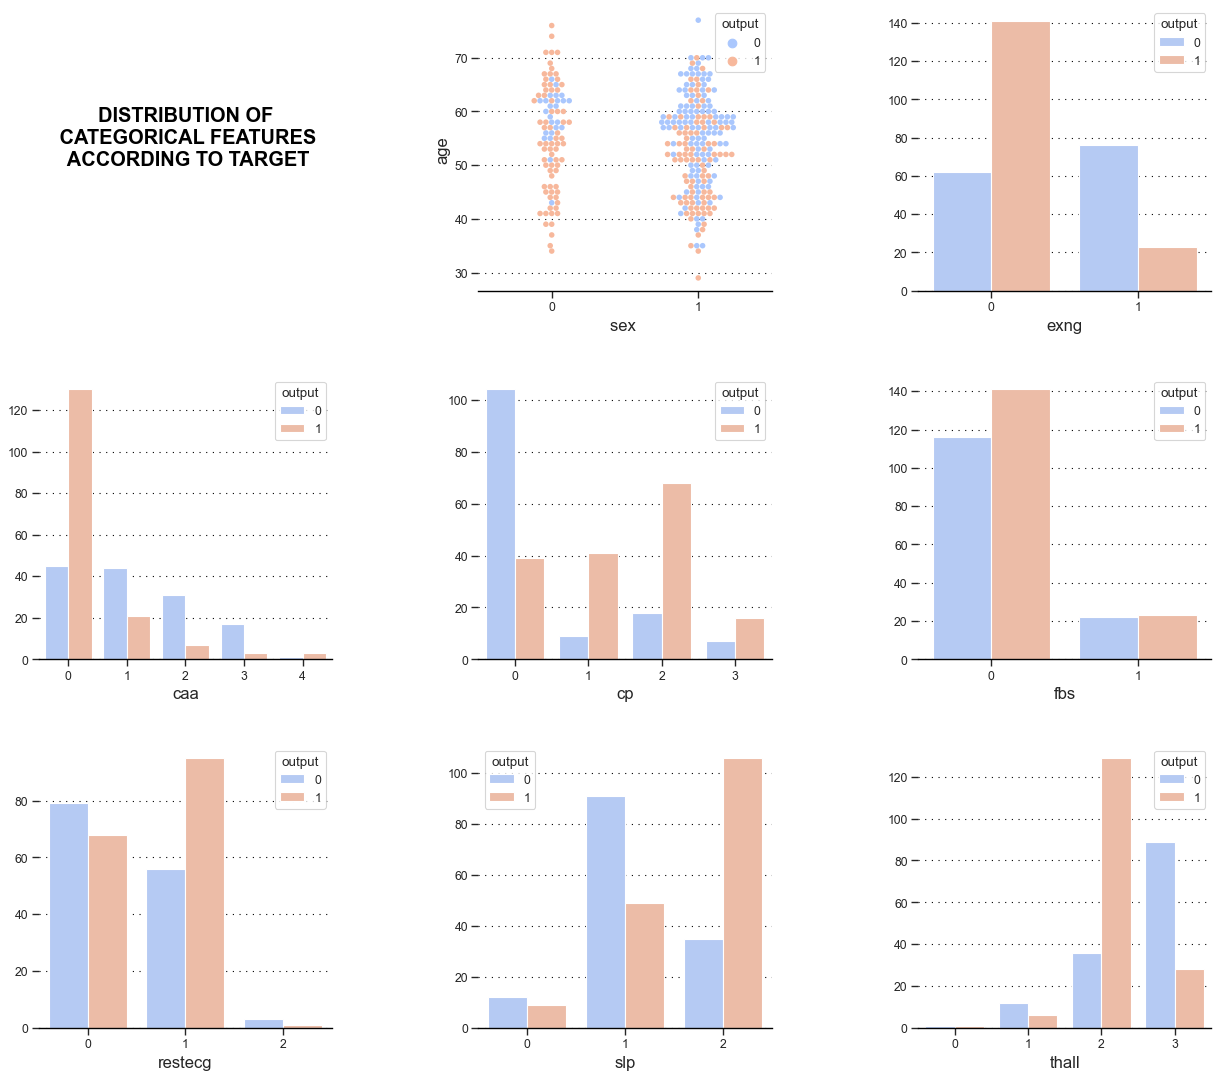

In [56]:
fig = plt.figure(figsize=(26,23),dpi=80)
gs = fig.add_gridspec(4,4)
gs.update(wspace=0.5, hspace=0.3)

ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[1,2])
ax6 = fig.add_subplot(gs[2,0])
ax7 = fig.add_subplot(gs[2,1])
ax8 = fig.add_subplot(gs[2,2])

background_color = "#FFFFFF"
color_palette = "coolwarm"

fig.patch.set_facecolor(background_color) 
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 
ax2.set_facecolor(background_color) 
ax3.set_facecolor(background_color) 
ax4.set_facecolor(background_color) 
ax5.set_facecolor(background_color) 
ax6.set_facecolor(background_color) 
ax7.set_facecolor(background_color) 
ax8.set_facecolor(background_color)


#Title
ax0.spines["bottom"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["top"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.axis('off')
ax0.text(0.5,0.5,'DISTRIBUTION OF\n CATEGORICAL FEATURES\n ACCORDING TO TARGET\n',horizontalalignment='center',
         verticalalignment='center',fontsize=18, fontweight='bold',fontfamily='sans-serif',color="#000000")

# Sex count
#ax1.text(0.3, 220, 'Sex', fontsize=14, fontweight='bold', fontfamily='sans-serif', color="#000000")
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.swarmplot(ax=ax1, x ='sex',y="age", data = df,hue="output", palette=color_palette)
#sns.countplot(ax=ax1,data=df,x='sex',hue='output',palette=color_palette)
ax1.set_xlabel("sex ",fontsize=15)
#sns.stripplot(ax=ax11, data=df,x='exng',y='age',hue='output',palette=["#8000ff","#da8829"])
ax1.set_ylabel("age",fontsize=15)
ax1.spines['bottom'].set_color('black')

# Exng count
#ax2.text(0.3, 220, 'Exng', fontsize=14, fontweight='bold', fontfamily='sans-serif', color="#000000")
ax2.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax2,data=df,x='exng',hue="output",palette=color_palette)
ax2.set_xlabel("exng",fontsize=15)
ax2.set_ylabel("")
ax2.spines['bottom'].set_color('black')

# Caa count
#ax3.text(1.5, 200, 'Caa', fontsize=14, fontweight='bold', fontfamily='sans-serif', color="#000000")
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax3,data=df,x='caa',hue="output",palette=color_palette)
ax3.set_xlabel("caa",fontsize=15)
ax3.set_ylabel("")
ax3.spines['bottom'].set_color('black')

# Cp count
#ax4.text(1.5, 162, 'Cp', fontsize=14, fontweight='bold', fontfamily='sans-serif', color="#000000")
ax4.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax4,data=df,x='cp',hue="output",palette=color_palette)
ax4.set_xlabel("cp",fontsize=15)
ax4.set_ylabel("")
ax4.spines['bottom'].set_color('black')

# Fbs count
#ax5.text(0.5, 290, 'Fbs', fontsize=14, fontweight='bold', fontfamily='sans-serif', color="#000000")
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax5,data=df,x='fbs',palette=color_palette, hue="output")
ax5.set_xlabel("fbs",fontsize=15)
ax5.set_ylabel("")
ax5.spines['bottom'].set_color('black')

# Restecg count
#ax6.text(0.75, 165, 'Restecg', fontsize=14, fontweight='bold', fontfamily='sans-serif', color="#000000")
ax6.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax6,data=df,x='restecg',hue="output",palette=color_palette)
ax6.set_xlabel("restecg",fontsize=15)
ax6.set_ylabel("")
ax6.spines['bottom'].set_color('black')

# Slp count
#ax7.text(0.85, 155, 'Slp', fontsize=14, fontweight='bold', fontfamily='sans-serif', color="#000000")
ax7.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax7,data=df,x='slp',hue="output",palette=color_palette)
ax7.set_xlabel("slp",fontsize=15)
ax7.set_ylabel("")
ax7.spines['bottom'].set_color('black')

# Thall count
#ax8.text(1.2, 180, 'Thall', fontsize=14, fontweight='bold', fontfamily='sans-serif', color="#000000")
ax8.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax8,data=df,x='thall',hue="output",palette=color_palette)
ax8.set_xlabel("thall",fontsize=15)
ax8.set_ylabel("")
ax8.spines['bottom'].set_color('black')

for s in ["top","right","left"]:
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)
    ax3.spines[s].set_visible(False)
    ax4.spines[s].set_visible(False)
    ax5.spines[s].set_visible(False)
    ax6.spines[s].set_visible(False)
    ax7.spines[s].set_visible(False)
    ax8.spines[s].set_visible(False)